In [137]:
import sklearn
import numpy as np
import os
import pandas as pd
import cv2

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#Import Warnings
import warnings
warnings.filterwarnings('ignore')

In [85]:
x_train = pd.read_csv("x_train_all.csv")
y_train = pd.read_csv("y_train_all.csv")
x_test = pd.read_csv("x_test_all.csv")

X = x_train.to_numpy()
Y = y_train.to_numpy()
X_test = x_test.to_numpy()

data = x_train.astype('float') / 255
test_data = x_test.astype('float') / 255

data_sm = np.apply_along_axis(
    func1d=lambda item: cv2.resize(item.reshape(48, 48), dsize=(30, 30)),
    axis=1, arr=data).reshape(-1, 30*30)

test_data_sm = np.apply_along_axis(
    func1d=lambda item: cv2.resize(item.reshape(48, 48), dsize=(30, 30)),
    axis=1, arr=test_data).reshape(-1, 30*30)

# K-Means Clustering

In [86]:
# Import the K-means algorithm
from sklearn.cluster import KMeans

In [87]:
# Set K as 10 since we have 10 classes
k = 10 
# Create the algorithm and fit the data
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_sm)

KMeans(n_clusters=10, random_state=42)

In [88]:
kmeans.labels_

array([0, 0, 0, ..., 5, 5, 1])

In [89]:
# Print the Inertia to measure the model performance
kmeans.inertia_

209960.32905728818

In [90]:
# Predict the class of random instances from test data
print(kmeans.predict([test_data_sm[0]])) # Actual 1
print(kmeans.predict([test_data_sm[500]])) # Actual 8
print(kmeans.predict([test_data_sm[1000]])) # Actual 8
print(kmeans.predict([test_data_sm[2000]])) # Actual 3

[4]
[0]
[4]
[8]


In [91]:
kmeans_labels = kmeans.labels_
unique_labels = np.unique(kmeans_labels)
label_count = len(unique_labels)
unique_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [92]:
# Group the indecies of each label into a 2D matrix
cluster_indecies = [[] for i in range(label_count)]

# Loop through the labeled data and group the indecies
for i, label in enumerate(kmeans_labels,0):
    for n in range(label_count):
        if label == n:
            cluster_indecies[n].append(i)
        else:
            continue

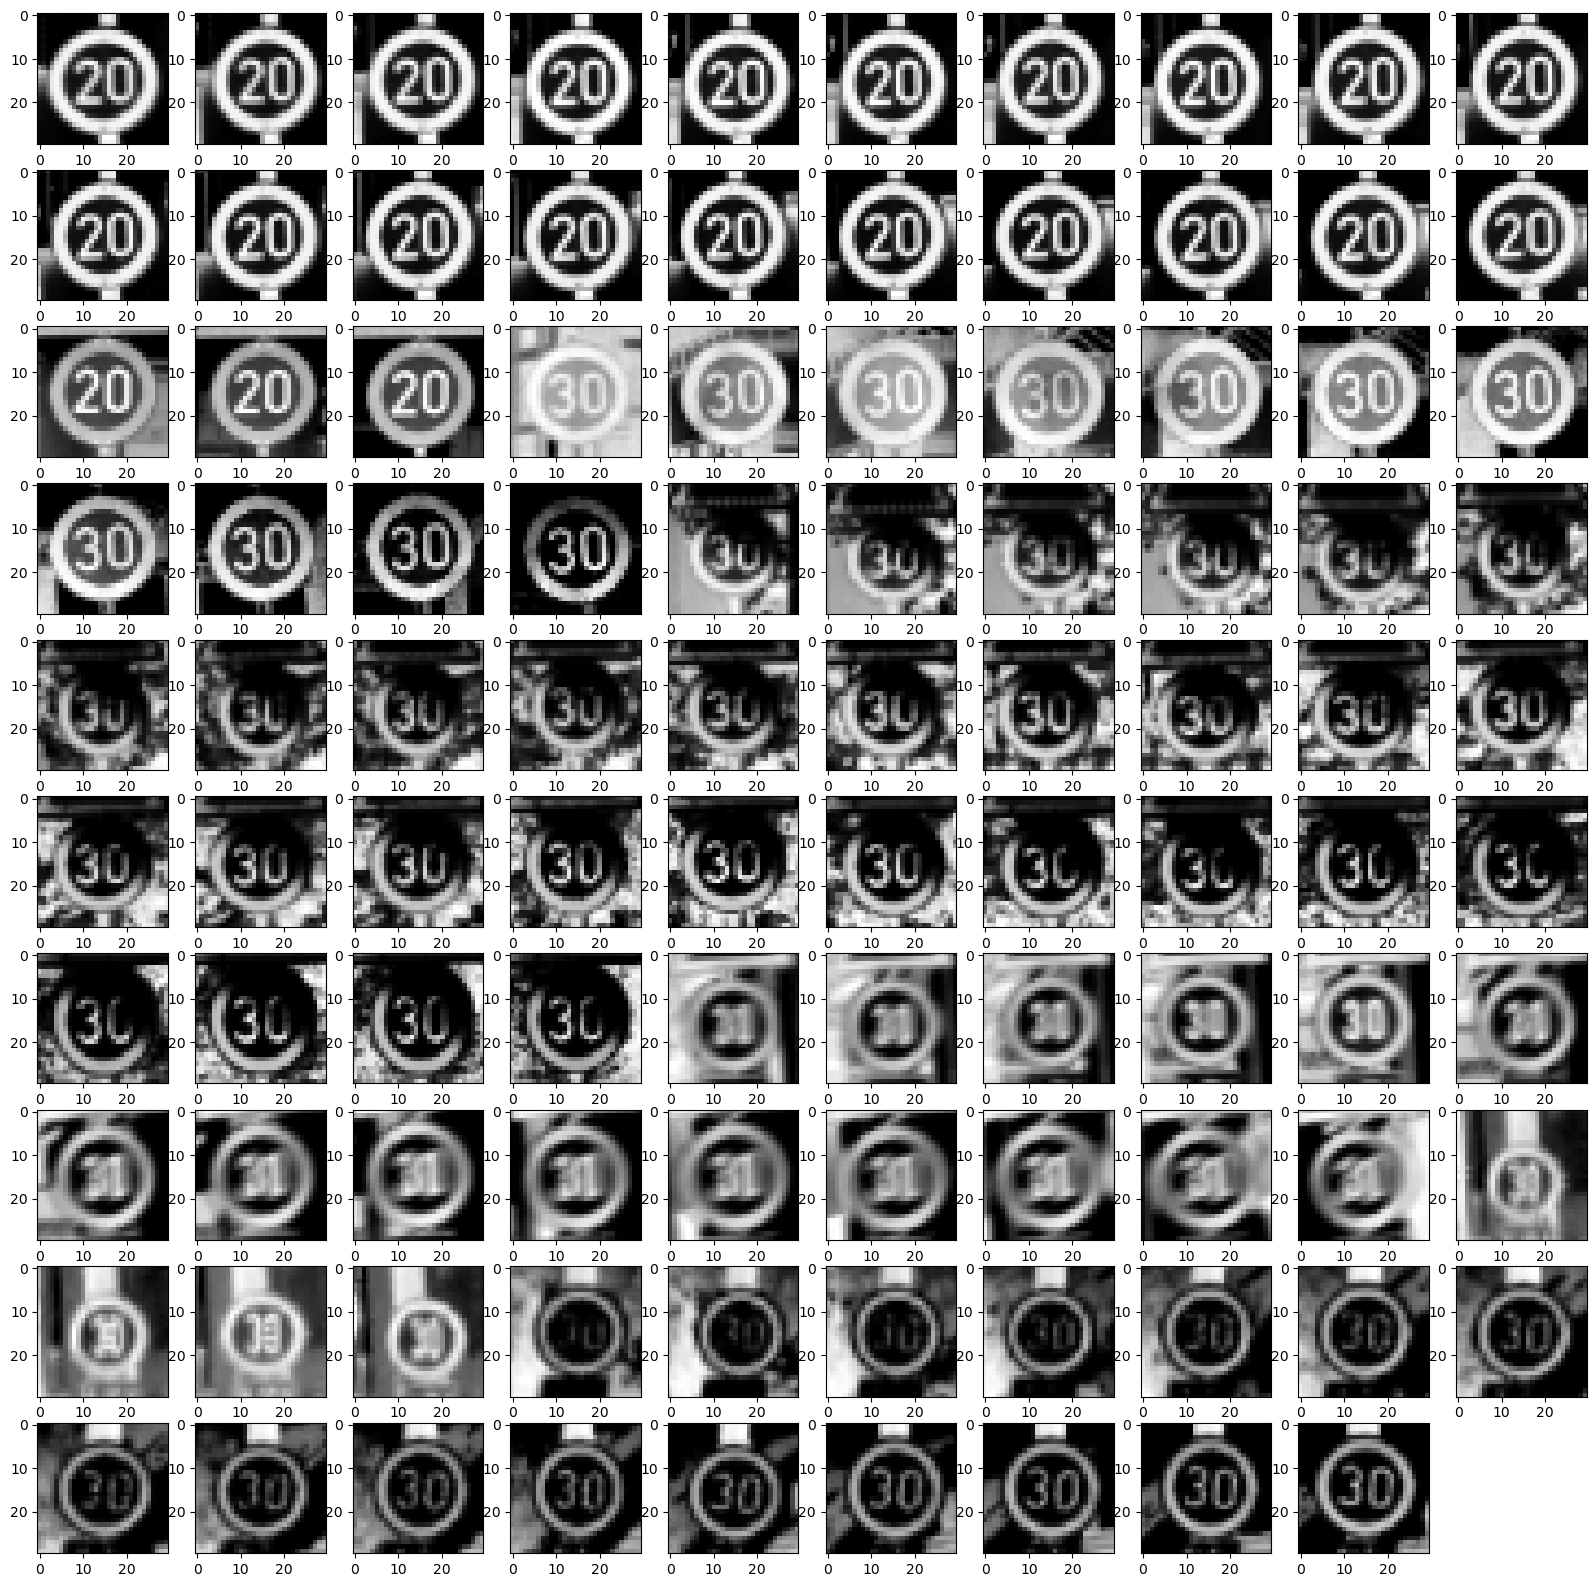

In [93]:
# Set the cluster to visualize
cluster_to_plot = 2

plt.figure(figsize=(20,20));

# Plot a 10x10 plot the first 100 records in the cluster
for i in range(1, 100): 
    plt.subplot(10, 10, i);
    plt.imshow(data_sm[cluster_indecies[cluster_to_plot][i]]
               .reshape(30,30), cmap = plt.cm.binary);
plt.show()

In [94]:
# Initialize empty matrix with the length of class labels
Y_clust = [[] for i in range(10)]

# Group instances of same cluster together
for i in range(10):
    Y_clust[i]= Y[cluster_indecies[i]]

In [95]:
# Empty matrix to hold the number counts
label_count= [[] for i in range(10)]

# Get the class frequency in each cluster
for i in range(10):
    unique, counts = np.unique(Y_clust[i], return_counts=True)
    label_index = dict(zip(unique, counts))
    label_count[i] = label_index

print("Cluster 1 data: ")
print(label_count[0])

Cluster 1 data: 
{0: 110, 1: 474, 2: 180, 3: 47, 4: 58, 5: 21, 6: 3, 7: 14, 8: 108, 9: 9}


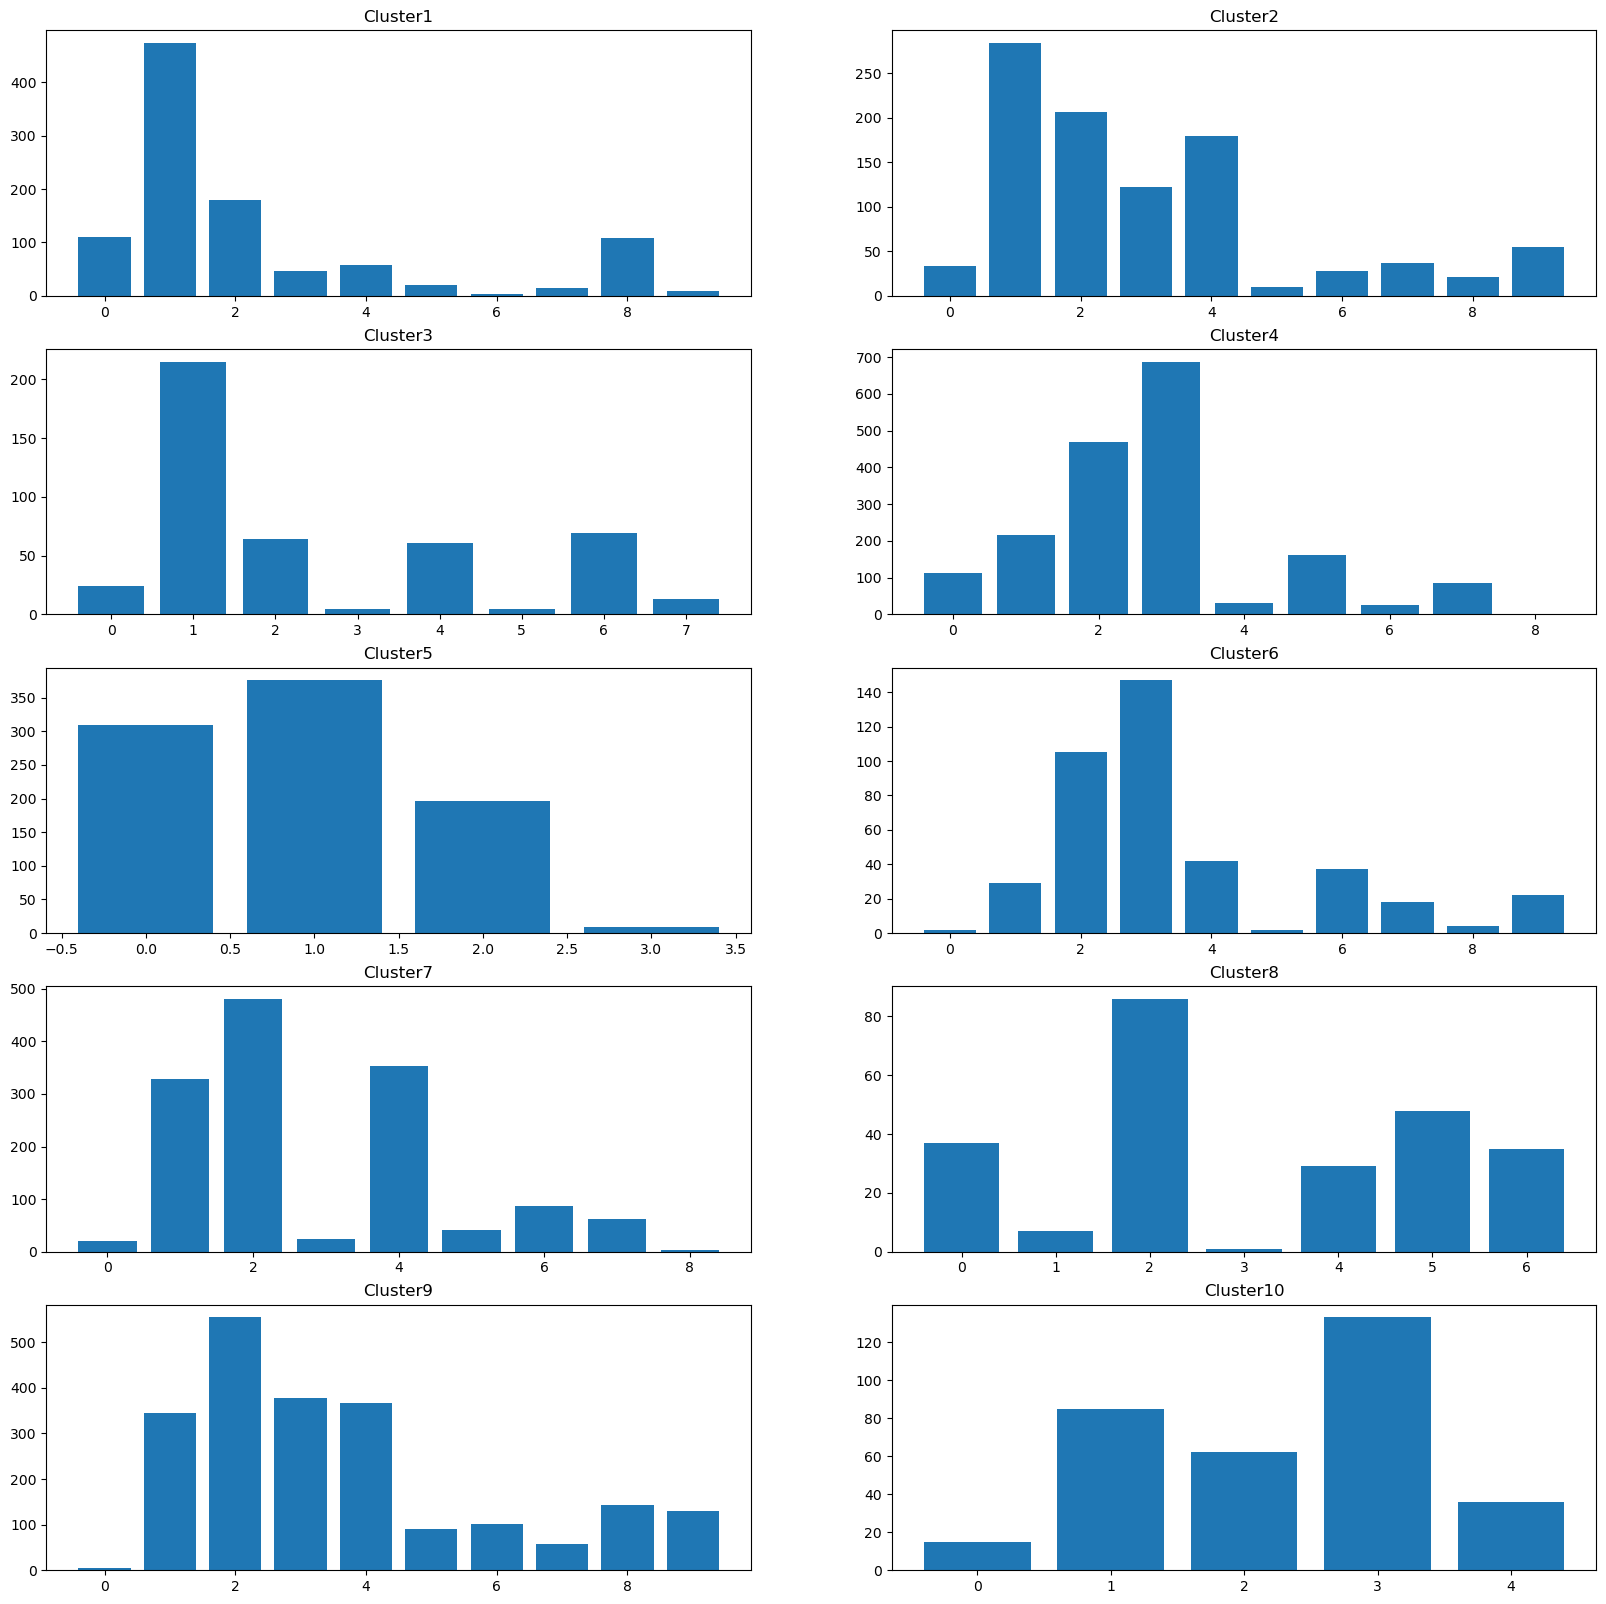

In [96]:
#Bar graph with the number of items of different categories clustered in it
plt.figure(figsize=(20,20))
for i in range (1,11):
    plt.subplot(5, 2, i)
    plt.bar(range(len(label_count[i-1])), 
            list(label_count[i-1].values()), 
            align='center')
    plt.title("Cluster" + str(i))

In [97]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data_sm)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

# Elbow Method

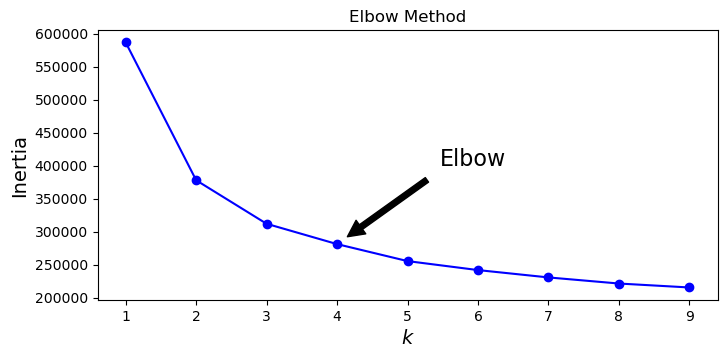

In [98]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.title('Elbow Method')
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis()
plt.show()

# Silhouette Scores

In [99]:
from sklearn.metrics import silhouette_score
silhouette_score(data_sm, kmeans.labels_)

0.1526485549649567

In [100]:
silhouette_scores = [silhouette_score(data_sm, model.labels_)
                     for model in kmeans_per_k[1:]]

In [101]:
silhouette_scores

[0.36199250927692317,
 0.3217608425200687,
 0.3184118193780918,
 0.22073142715775496,
 0.21321231210718583,
 0.2148880288244847,
 0.1608976428865703,
 0.1502070363918753]

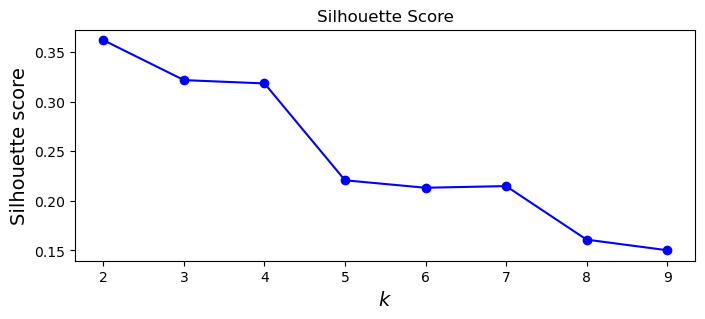

In [102]:
# Plot the Silhouette scores
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title('Silhouette Score')
plt.axis()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.36199250927692317
For n_clusters = 3 The average silhouette_score is : 0.3217608425200687
For n_clusters = 4 The average silhouette_score is : 0.3171138432022182
For n_clusters = 5 The average silhouette_score is : 0.22109554378872212
For n_clusters = 6 The average silhouette_score is : 0.2126490382538856
For n_clusters = 7 The average silhouette_score is : 0.2156551177446252
For n_clusters = 8 The average silhouette_score is : 0.16043126713350195


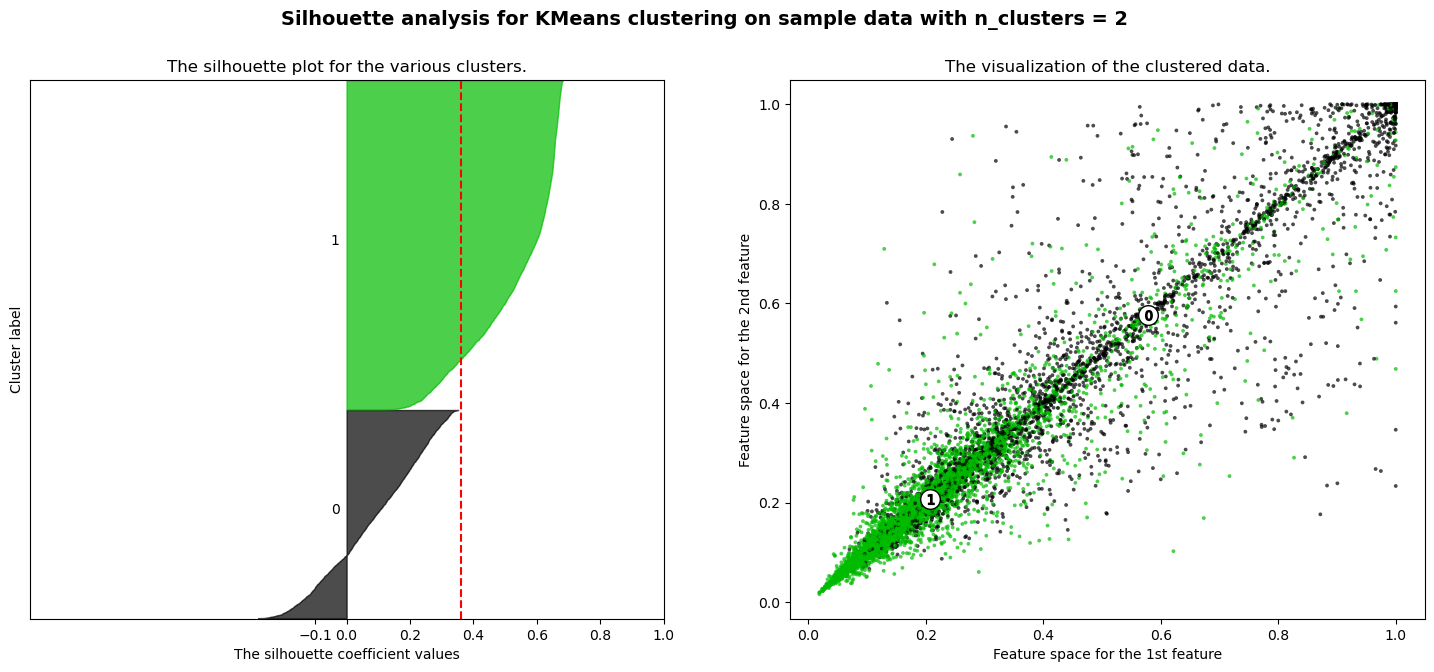

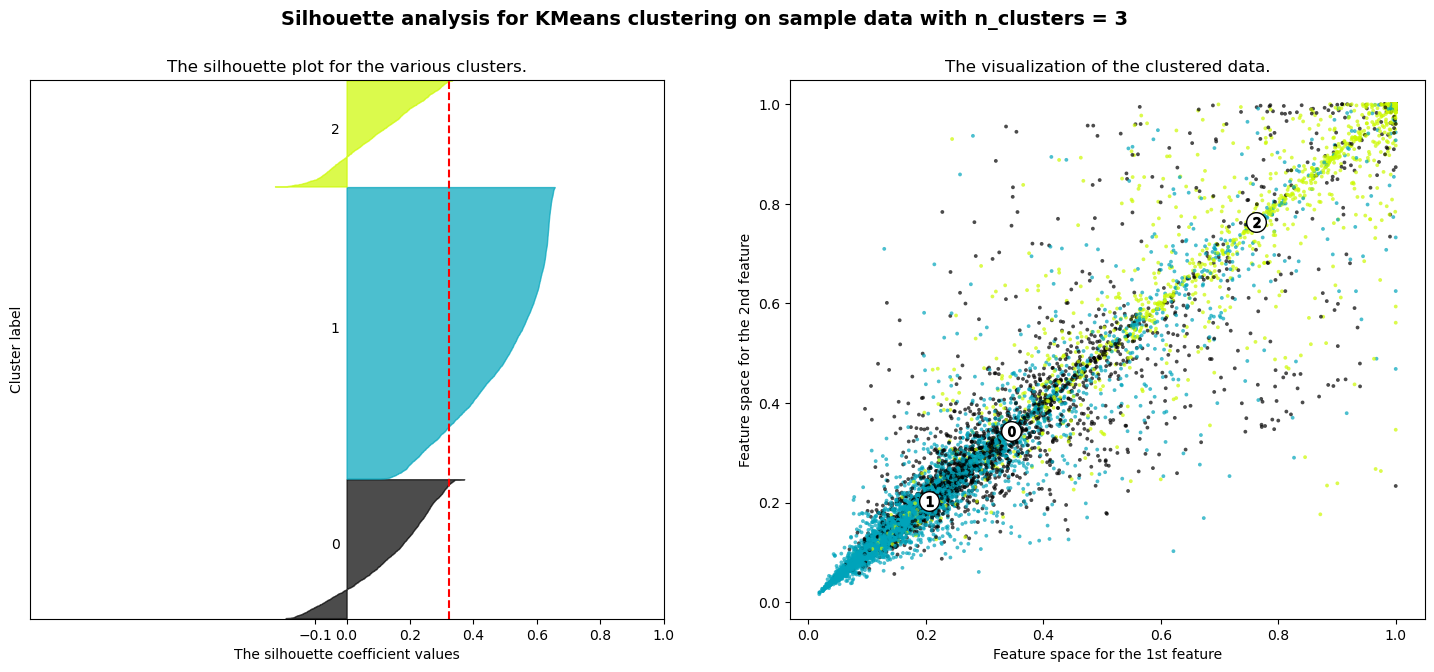

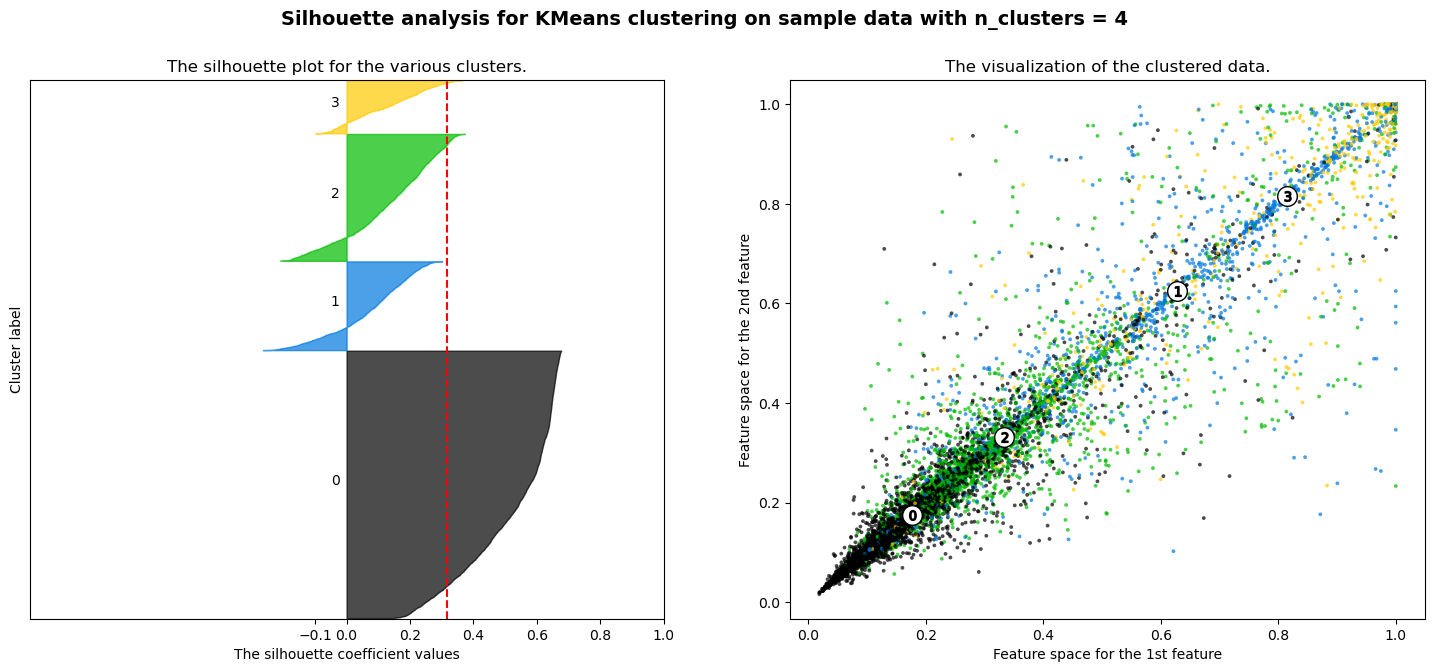

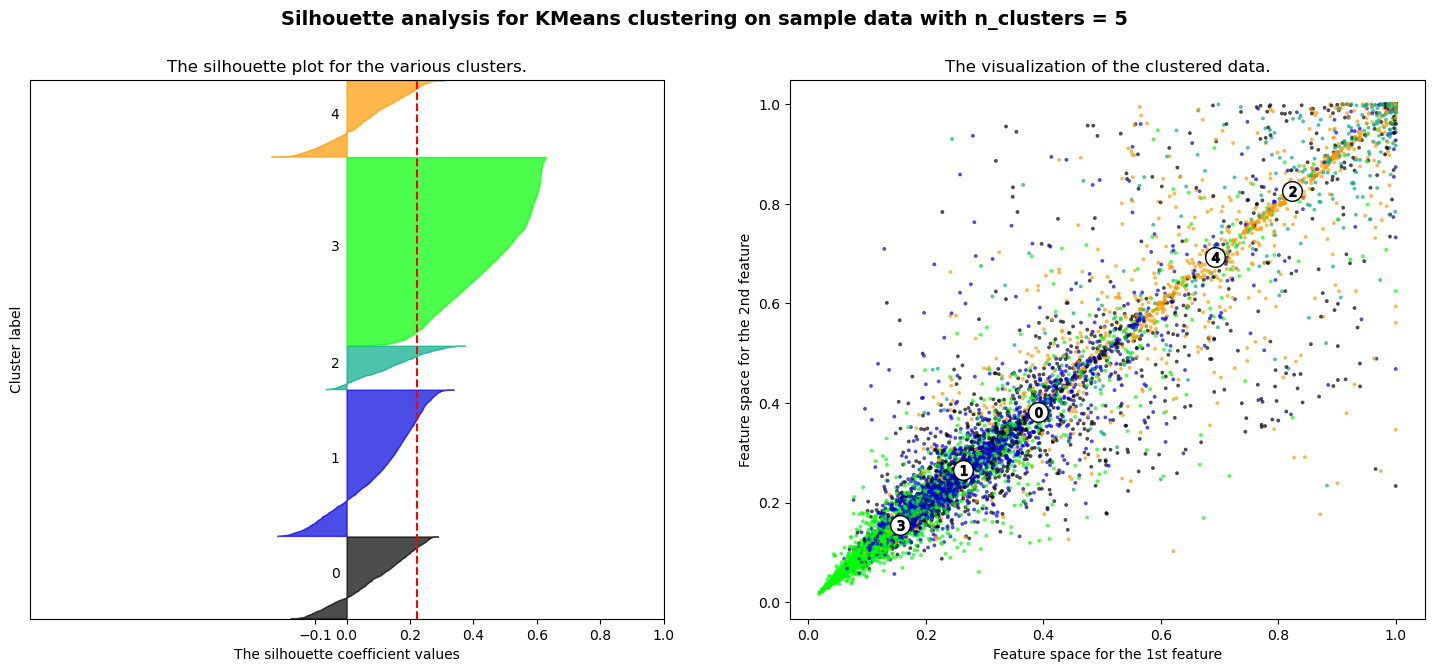

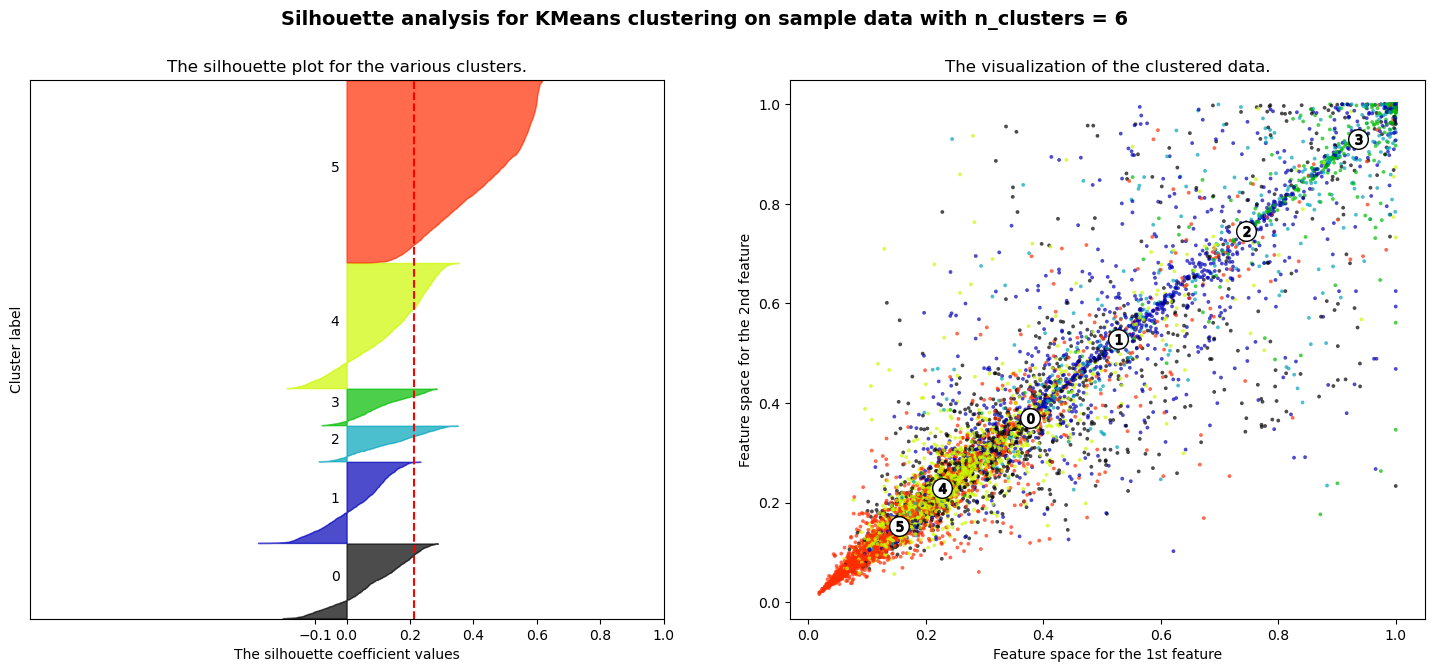

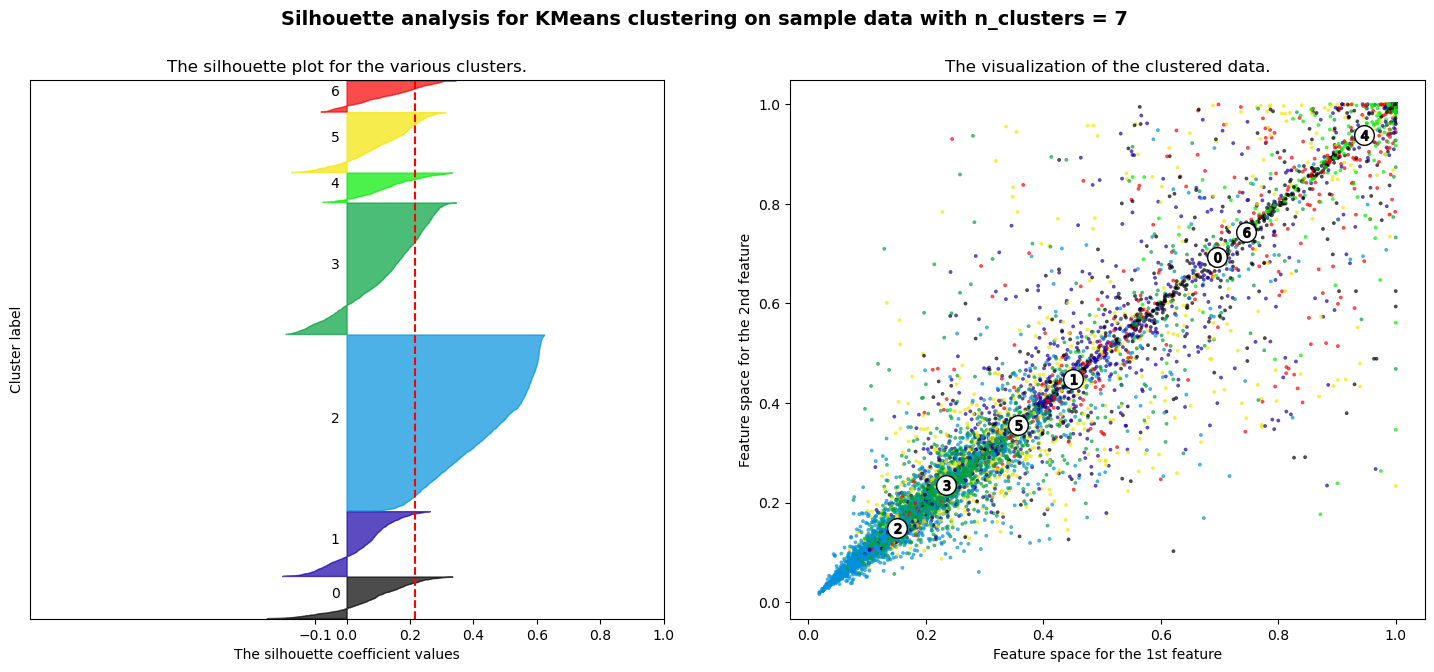

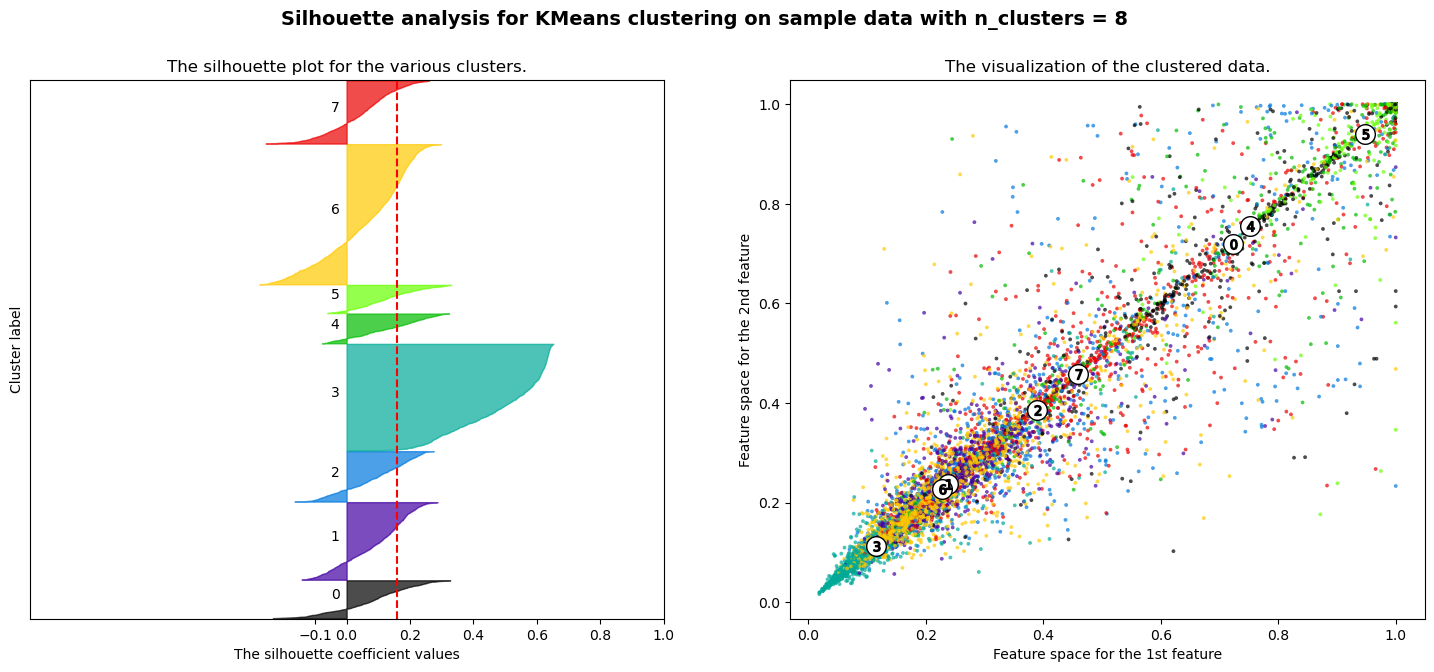

In [115]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_sm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_sm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_sm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_sm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_sm[:, 0], data_sm[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Hierarchical Clustering

In [117]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.image import grid_to_graph


k = 5  # number of clusters
model2 = AgglomerativeClustering(n_clusters=k)
model2.fit(data_sm)
y_pred = model2.fit_predict(test_data_sm)

In [119]:
y_pred is model2.labels_

True

In [121]:
model2.labels_

array([0, 1, 2, ..., 3, 0, 0], dtype=int64)

In [128]:
model2_labels = ward.labels_
unique_labels = np.unique(model2_labels)
label_count = len(unique_labels)
unique_labels

array([0, 1, 2, 3], dtype=int64)

In [129]:
# Group the indecies of each label into a 2D matrix
cluster_indecies = [[] for i in range(label_count)]

# Loop through the labeled data and group the indecies
for i, label in enumerate(model2_labels,0):
    for n in range(label_count):
        if label == n:
            cluster_indecies[n].append(i)
        else:
            continue

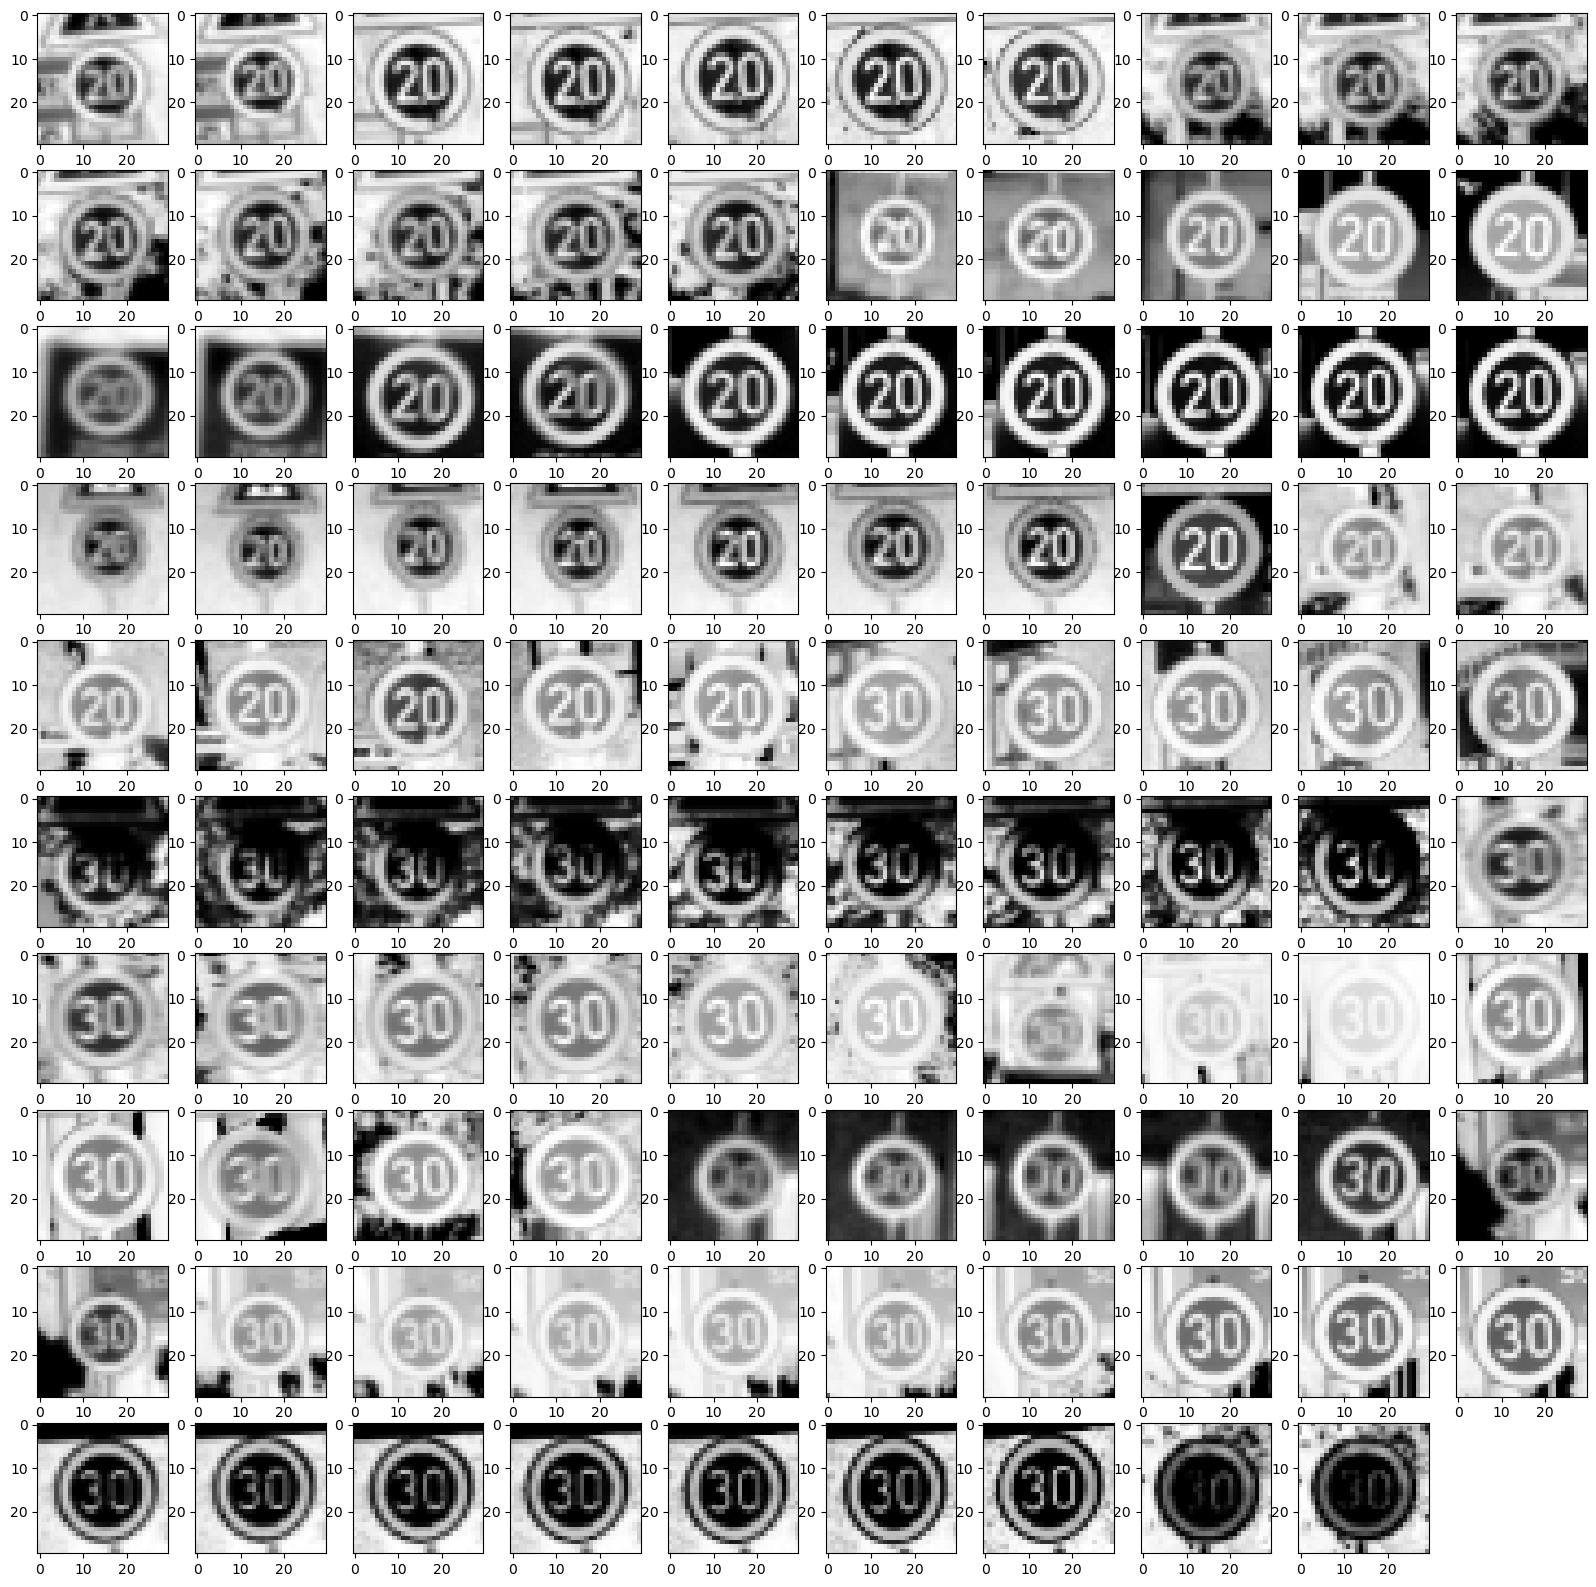

In [133]:
# Set the cluster to visualize
cluster_to_plot = 2

plt.figure(figsize=(20,20));

# Plot a 10x10 plot the first 100 records in the cluster
for i in range(1, 100): 
    plt.subplot(10, 10, i);
    plt.imshow(data_sm[cluster_indecies[cluster_to_plot][i]]
               .reshape(30,30), cmap = plt.cm.binary);
plt.show()

In [126]:
# Initialize empty matrix with the length of class labels
Y_clust = [[] for i in range(4)]

# Group instances of same cluster together
for i in range(4):
    Y_clust[i]= Y[cluster_indecies[i]]

In [131]:
# Empty matrix to hold the number counts
ward_labels= [[] for i in range(4)]

# Get the class frequency in each cluster
for i in range(4):
    unique_labels, label_count = np.unique(Y_clust[i], return_counts=True)
    label_index = dict(zip(unique_labels, label_count))
    ward_labels[i] = label_index

print("Cluster 1 data: ")
print(ward_labels[0])

Cluster 1 data: 
{0: 109, 1: 1230, 2: 346}


# GMM Clustering

In [134]:
# Splitting the data into Train and Test from traning dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_sm, Y, test_size = 0.3, random_state = 1)

In [135]:
from sklearn.mixture import GaussianMixture
n_clusters = 4
gm = GaussianMixture(n_components=n_clusters, random_state=0)
gm.fit(X_train, y_train)
pred=gm.predict(X_test)
pred

array([0, 0, 2, ..., 2, 2, 2], dtype=int64)

In [136]:
gm.score(X_test, pred)

1044.053038598715